## 0. Import Packages

In [126]:
# for data managaement
import numpy as np
import pandas as pd
import time
from datetime import datetime, timedelta

# for charting
import plotly
import plotly.graph_objects as go

## 1. Import and Inspect data

In [127]:
data = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv',usecols = list(range(0,10)))

## 2. Data cleaning & wrangling

In [128]:
# make datetime
data['dateRep'] = pd.to_datetime(data['dateRep'], dayfirst=True)

#sort values by country and date
data.sort_values(by=['countriesAndTerritories','dateRep'], ascending = True, inplace = True)

#reindex the data now its sorted to prevent errors when creating aggregates
data = data.reindex()

In [129]:
data['total_cases'] = data.groupby(by='countriesAndTerritories')['cases'].cumsum()
data['total_deaths'] = data.groupby(by='countriesAndTerritories')['deaths'].cumsum()

C:\Users\lundr\Miniconda3\envs\dsj\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



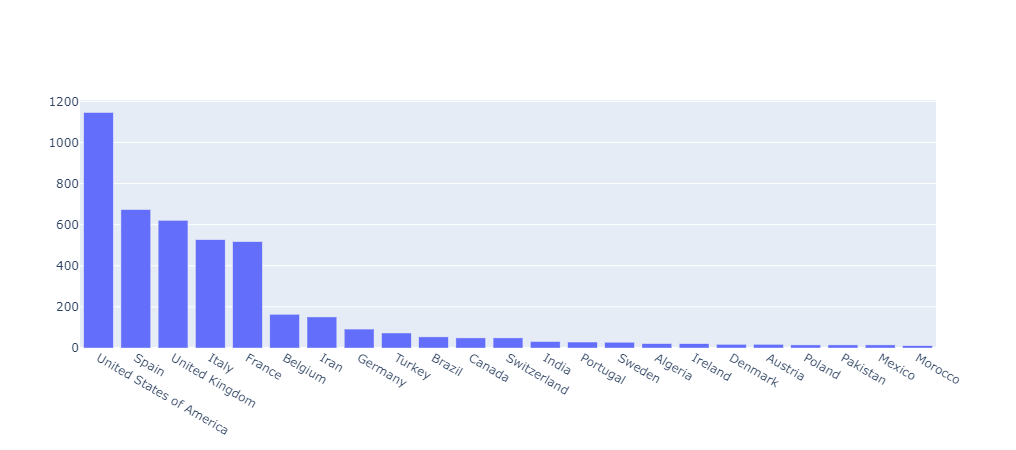

In [19]:
chart_data = data.loc[data['dateRep'] == max(data['dateRep'])][data['deaths']>10].sort_values(by='deaths', ascending = False).reset_index()

# choose the series to plot on the x and y axes
x = [' '.join(x.split('_')) for x in chart_data['countriesAndTerritories']]
y = chart_data ['deaths']

# describe the chart you want
trace0 = go.Bar(x=x, y=y)

# make the chart
fig = go.Figure(trace0)

# show the chart
fig.show()

C:\Users\lundr\Miniconda3\envs\dsj\lib\site-packages\ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\lundr\Miniconda3\envs\dsj\lib\site-packages\ipykernel_launcher.py:20: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



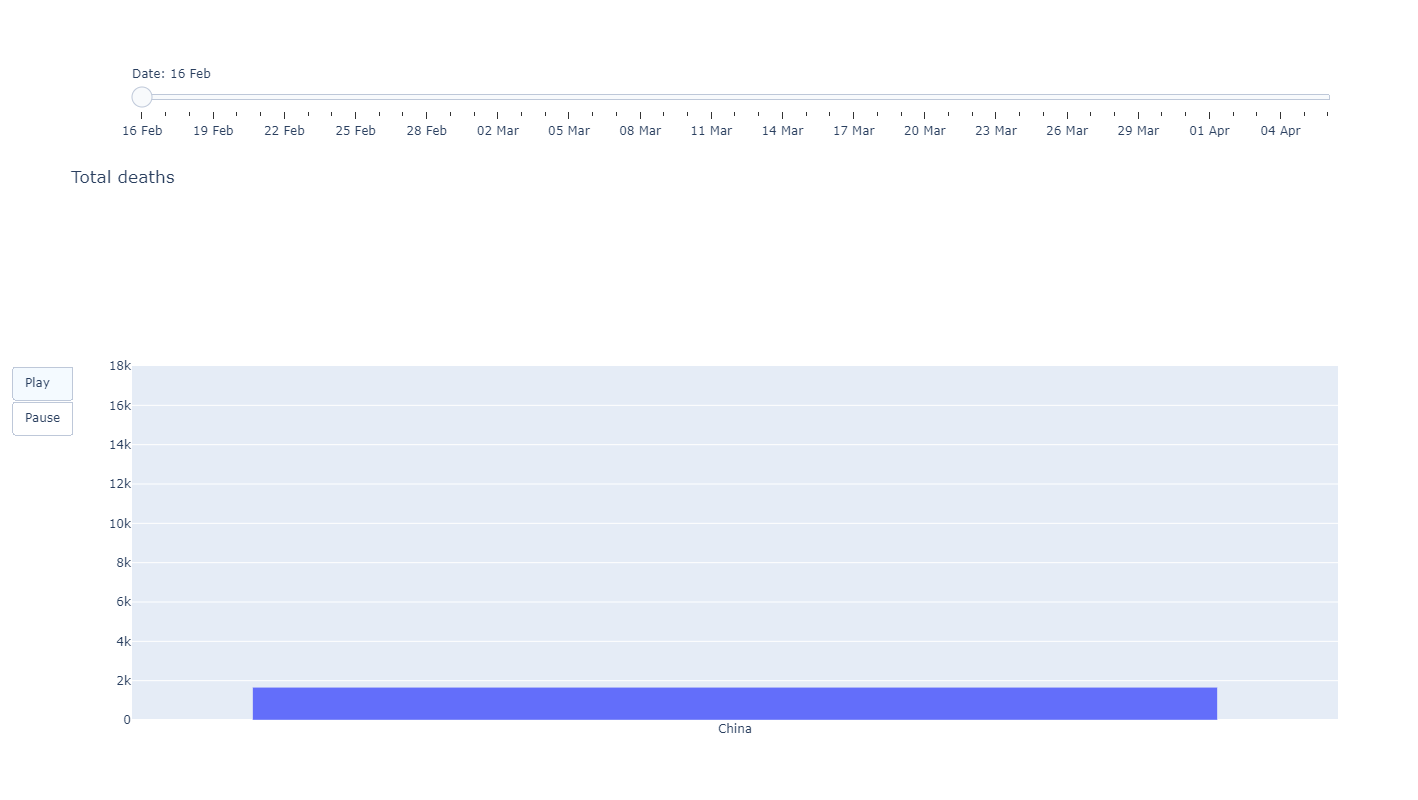

In [172]:

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
days = data['dateRep'][data['dateRep'] > pd.to_datetime('15-02-2020')].sort_values(ascending=True).unique()

#figure['layout']['updatemenus'] = 


for day in days:
    chart_data_2 = data.loc[data['dateRep'] == day][data['total_deaths']>20].sort_values(by = 'total_deaths', ascending = False)
    
    fig.add_trace(go.Bar(x = [' '.join(x.split('_')) for x in chart_data_2['countriesAndTerritories']],
                     y=chart_data_2['total_deaths'],
              visible = False,
              name = ''))
    
frames = [] 
for day in days:
    chart_data_2 = data.loc[data['dateRep'] == day][data['total_deaths']>20].sort_values(by = 'total_deaths', ascending = False)
    frame = go.Frame(data =[ go.Bar(x = [' '.join(x.split('_')) for x in chart_data_2['countriesAndTerritories']],
                     y=chart_data_2['total_deaths'],
              name = '')]) 
        
    frames.append(frame)  
    
fig.frames=frames

# Make 10th trace visible
fig.data[0].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
        label = pd.to_datetime(str(days[i])).strftime("%d %b")
        
    )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    y = 2,
    active=0,
    currentvalue={"prefix": "Date: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    height = 800,
    title = 'Total deaths',
    updatemenus = [dict(type ='buttons',
                        buttons=list([
                dict(
                    args=[None],
                    label="Play",
                    method="animate"
                ),
                            dict(
                    args=[None,{"mode": "immediate"}],
                    label="Pause",
                    method="animate")]
                            
                        ))]

)

fig.layout.yaxis.update(range=[0,
                              18000])

fig.show()